In [44]:
#Importing the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib as mpl
from wordcloud import WordCloud
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

In [45]:
#Reading the dataframe
df=pd.read_csv('global_inflation_data.csv')
#Viewing a sample of the dataframe
df.head()

,country_name,indicator_name,1980,1981,1982,1983,1984,1985,1986,1987,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,Annual average inflation (consumer prices) rate,13.4,22.2,18.2,15.9,20.4,8.7,-2.1,18.4,...,-0.66,4.38,4.98,0.63,2.3,5.44,5.06,13.71,9.1,NaN
1,Albania,Annual average inflation (consumer prices) rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.90,1.30,2.00,2.00,1.4,1.60,2.00,6.70,4.8,4.0
2,Algeria,Annual average inflation (consumer prices) rate,9.7,14.6,6.6,7.8,6.3,10.4,14.0,5.9,...,4.80,6.40,5.60,4.30,2.0,2.40,7.20,9.30,9.0,6.8
3,Andorra,Annual average inflation (consumer prices) rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.10,-0.40,2.60,1.00,0.5,0.10,1.70,6.20,5.2,3.5
4,Angola,Annual average inflation (consumer prices) rate,46.7,1.4,1.8,1.8,1.8,1.8,1.8,1.8,...,9.20,30.70,29.80,19.60,17.1,22.30,25.80,21.40,13.1,22.3


In [46]:
#Number of observations and variables
df.shape

(196, 47)

In [47]:
#Getting information about columns and null values in each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 47 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    196 non-null    object 
 1   indicator_name  196 non-null    object 
 2   1980            140 non-null    float64
 3   1981            144 non-null    float64
 4   1982            145 non-null    float64
 5   1983            145 non-null    float64
 6   1984            145 non-null    float64
 7   1985            145 non-null    float64
 8   1986            145 non-null    float64
 9   1987            147 non-null    float64
 10  1988            147 non-null    float64
 11  1989            147 non-null    float64
 12  1990            150 non-null    float64
 13  1991            155 non-null    float64
 14  1992            158 non-null    float64
 15  1993            169 non-null    float64
 16  1994            171 non-null    float64
 17  1995            172 non-null    flo

In [48]:
#Getting the type of each of the variables
df.dtypes

country_name       object
indicator_name     object
1980              float64
1981              float64
1982              float64
1983              float64
1984              float64
1985              float64
1986              float64
1987              float64
1988              float64
1989              float64
1990              float64
1991              float64
1992              float64
1993              float64
1994              float64
1995              float64
1996              float64
1997              float64
1998              float64
1999              float64
2000              float64
2001              float64
2002              float64
2003              float64
2004              float64
2005              float64
2006              float64
2007              float64
2008              float64
2009              float64
2010              float64
2011              float64
2012              float64
2013              float64
2014              float64
2015              float64
2016        

In [49]:
#Observing if different indicators have been used for which normalization might be necessary
df['indicator_name'].unique()

array(['Annual average inflation (consumer prices) rate'], dtype=object)

In [50]:
#Since all the indicators are the same dropping the column
df1=df.drop(columns=['indicator_name'],axis=1)
df1.head()

,country_name,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,13.4,22.2,18.2,15.9,20.4,8.7,-2.1,18.4,27.5,...,-0.66,4.38,4.98,0.63,2.3,5.44,5.06,13.71,9.1,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.90,1.30,2.00,2.00,1.4,1.60,2.00,6.70,4.8,4.0
2,Algeria,9.7,14.6,6.6,7.8,6.3,10.4,14.0,5.9,5.9,...,4.80,6.40,5.60,4.30,2.0,2.40,7.20,9.30,9.0,6.8
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.10,-0.40,2.60,1.00,0.5,0.10,1.70,6.20,5.2,3.5
4,Angola,46.7,1.4,1.8,1.8,1.8,1.8,1.8,1.8,1.8,...,9.20,30.70,29.80,19.60,17.1,22.30,25.80,21.40,13.1,22.3


In [51]:
#Calculating the average inflation for each country for all the years
average_inflation_by_country=df1.iloc[:, 2:].mean(axis=1)
#Naming the column as Average Inflation by Country
average_inflation_by_country.name='Average Inflation by Country'

In [52]:
#Combining the average inflation series with the corresponding country names
average_inflation_by_country_with_names = pd.concat([df1['country_name'], average_inflation_by_country], axis=1)
#Viewing the combined dataframe
average_inflation_by_country_with_names.head()

,country_name,Average Inflation by Country
0,Afghanistan,15.296279
1,Albania,14.597143
2,Algeria,8.463636
3,Andorra,2.069565
4,Angola,254.436364


,country_name,Average Inflation by Country
0,Afghanistan,15.296279
1,Albania,14.597143
2,Algeria,8.463636
3,Andorra,2.069565
4,Angola,254.436364
5,Antigua and Barbuda,2.875000
6,Argentina,25.758333
7,Armenia,291.196875
8,Aruba,2.894737
9,Australia,3.913636


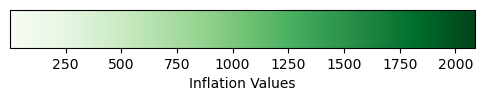

In [53]:
styled_df = average_inflation_by_country_with_names.style.background_gradient(cmap = 'Greens', subset = ['Average Inflation by Country'])
display(styled_df)
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)
cmap = mpl.cm.Greens
norm = Normalize(vmin=average_inflation_by_country_with_names['Average Inflation by Country'].min(), vmax=average_inflation_by_country_with_names['Average Inflation by Country'].max())
cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
cb1.set_label('Inflation Values')
plt.show()

__The above visualization shades the Average Inflation by Country for each of the countries, i.e., countries with the highest average inflation over the years have darker shade of green, while others lighter. In the above visual; however, there are some countries which have significantly higher average inflation than others resulting in the colors for most countries not showing a significant enough difference.__

In [54]:
#Dropping countries with hyperinflation from the list
average_inflation1=average_inflation_by_country_with_names[average_inflation_by_country_with_names['Average Inflation by Country']<=100]
average_inflation1

,country_name,Average Inflation by Country
0,Afghanistan,15.296279
1,Albania,14.597143
2,Algeria,8.463636
3,Andorra,2.069565
5,Antigua and Barbuda,2.875000
...,...,...
191,Vietnam,45.665909
192,West Bank and Gaza,3.053571
193,Yemen,22.447059
194,Zambia,30.722727


,country_name,Average Inflation by Country
0,Afghanistan,15.296279
1,Albania,14.597143
2,Algeria,8.463636
3,Andorra,2.069565
5,Antigua and Barbuda,2.875000
6,Argentina,25.758333
8,Aruba,2.894737
9,Australia,3.913636
10,Austria,2.611364
12,"Bahamas, The",3.020455


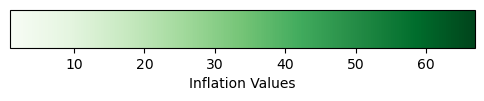

In [55]:
styled_df = average_inflation1.style.background_gradient(cmap = 'Greens', subset = ['Average Inflation by Country'])
display(styled_df)
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)
cmap = mpl.cm.Greens
norm = Normalize(vmin=average_inflation1['Average Inflation by Country'].min(), vmax=average_inflation1['Average Inflation by Country'].max())
cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
cb1.set_label('Inflation Values')
plt.show()

__Conducting a similar visualization again with countries having hyperinflation during the decades being dropped to now do a more comparable analysis of countries with high levels of inflation on average.__

In [56]:
#Choosing the countries with the least inflation levels over the years
lowest=average_inflation_by_country_with_names.sort_values('Average Inflation by Country').head(10)
lowest

,country_name,Average Inflation by Country
85,Japan,0.918182
25,Brunei Darussalam,1.137209
150,Saudi Arabia,1.245455
167,Switzerland,1.563636
13,Bahrain,1.606818
130,Oman,1.654545
170,Taiwan Province of China,1.788636
133,Panama,1.890909
155,Singapore,1.977273
149,San Marino,2.031818


/Users/sarthakyadav/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/sarthakyadav/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/sarthakyadav/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



(array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25]),
 [Text(0, 0.0, '0.00'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.5, '0.50'),
  Text(0, 0.75, '0.75'),
  Text(0, 1.0, '1.00'),
  Text(0, 1.25, '1.25'),
  Text(0, 1.5, '1.50'),
  Text(0, 1.75, '1.75'),
  Text(0, 2.0, '2.00'),
  Text(0, 2.25, '2.25')])

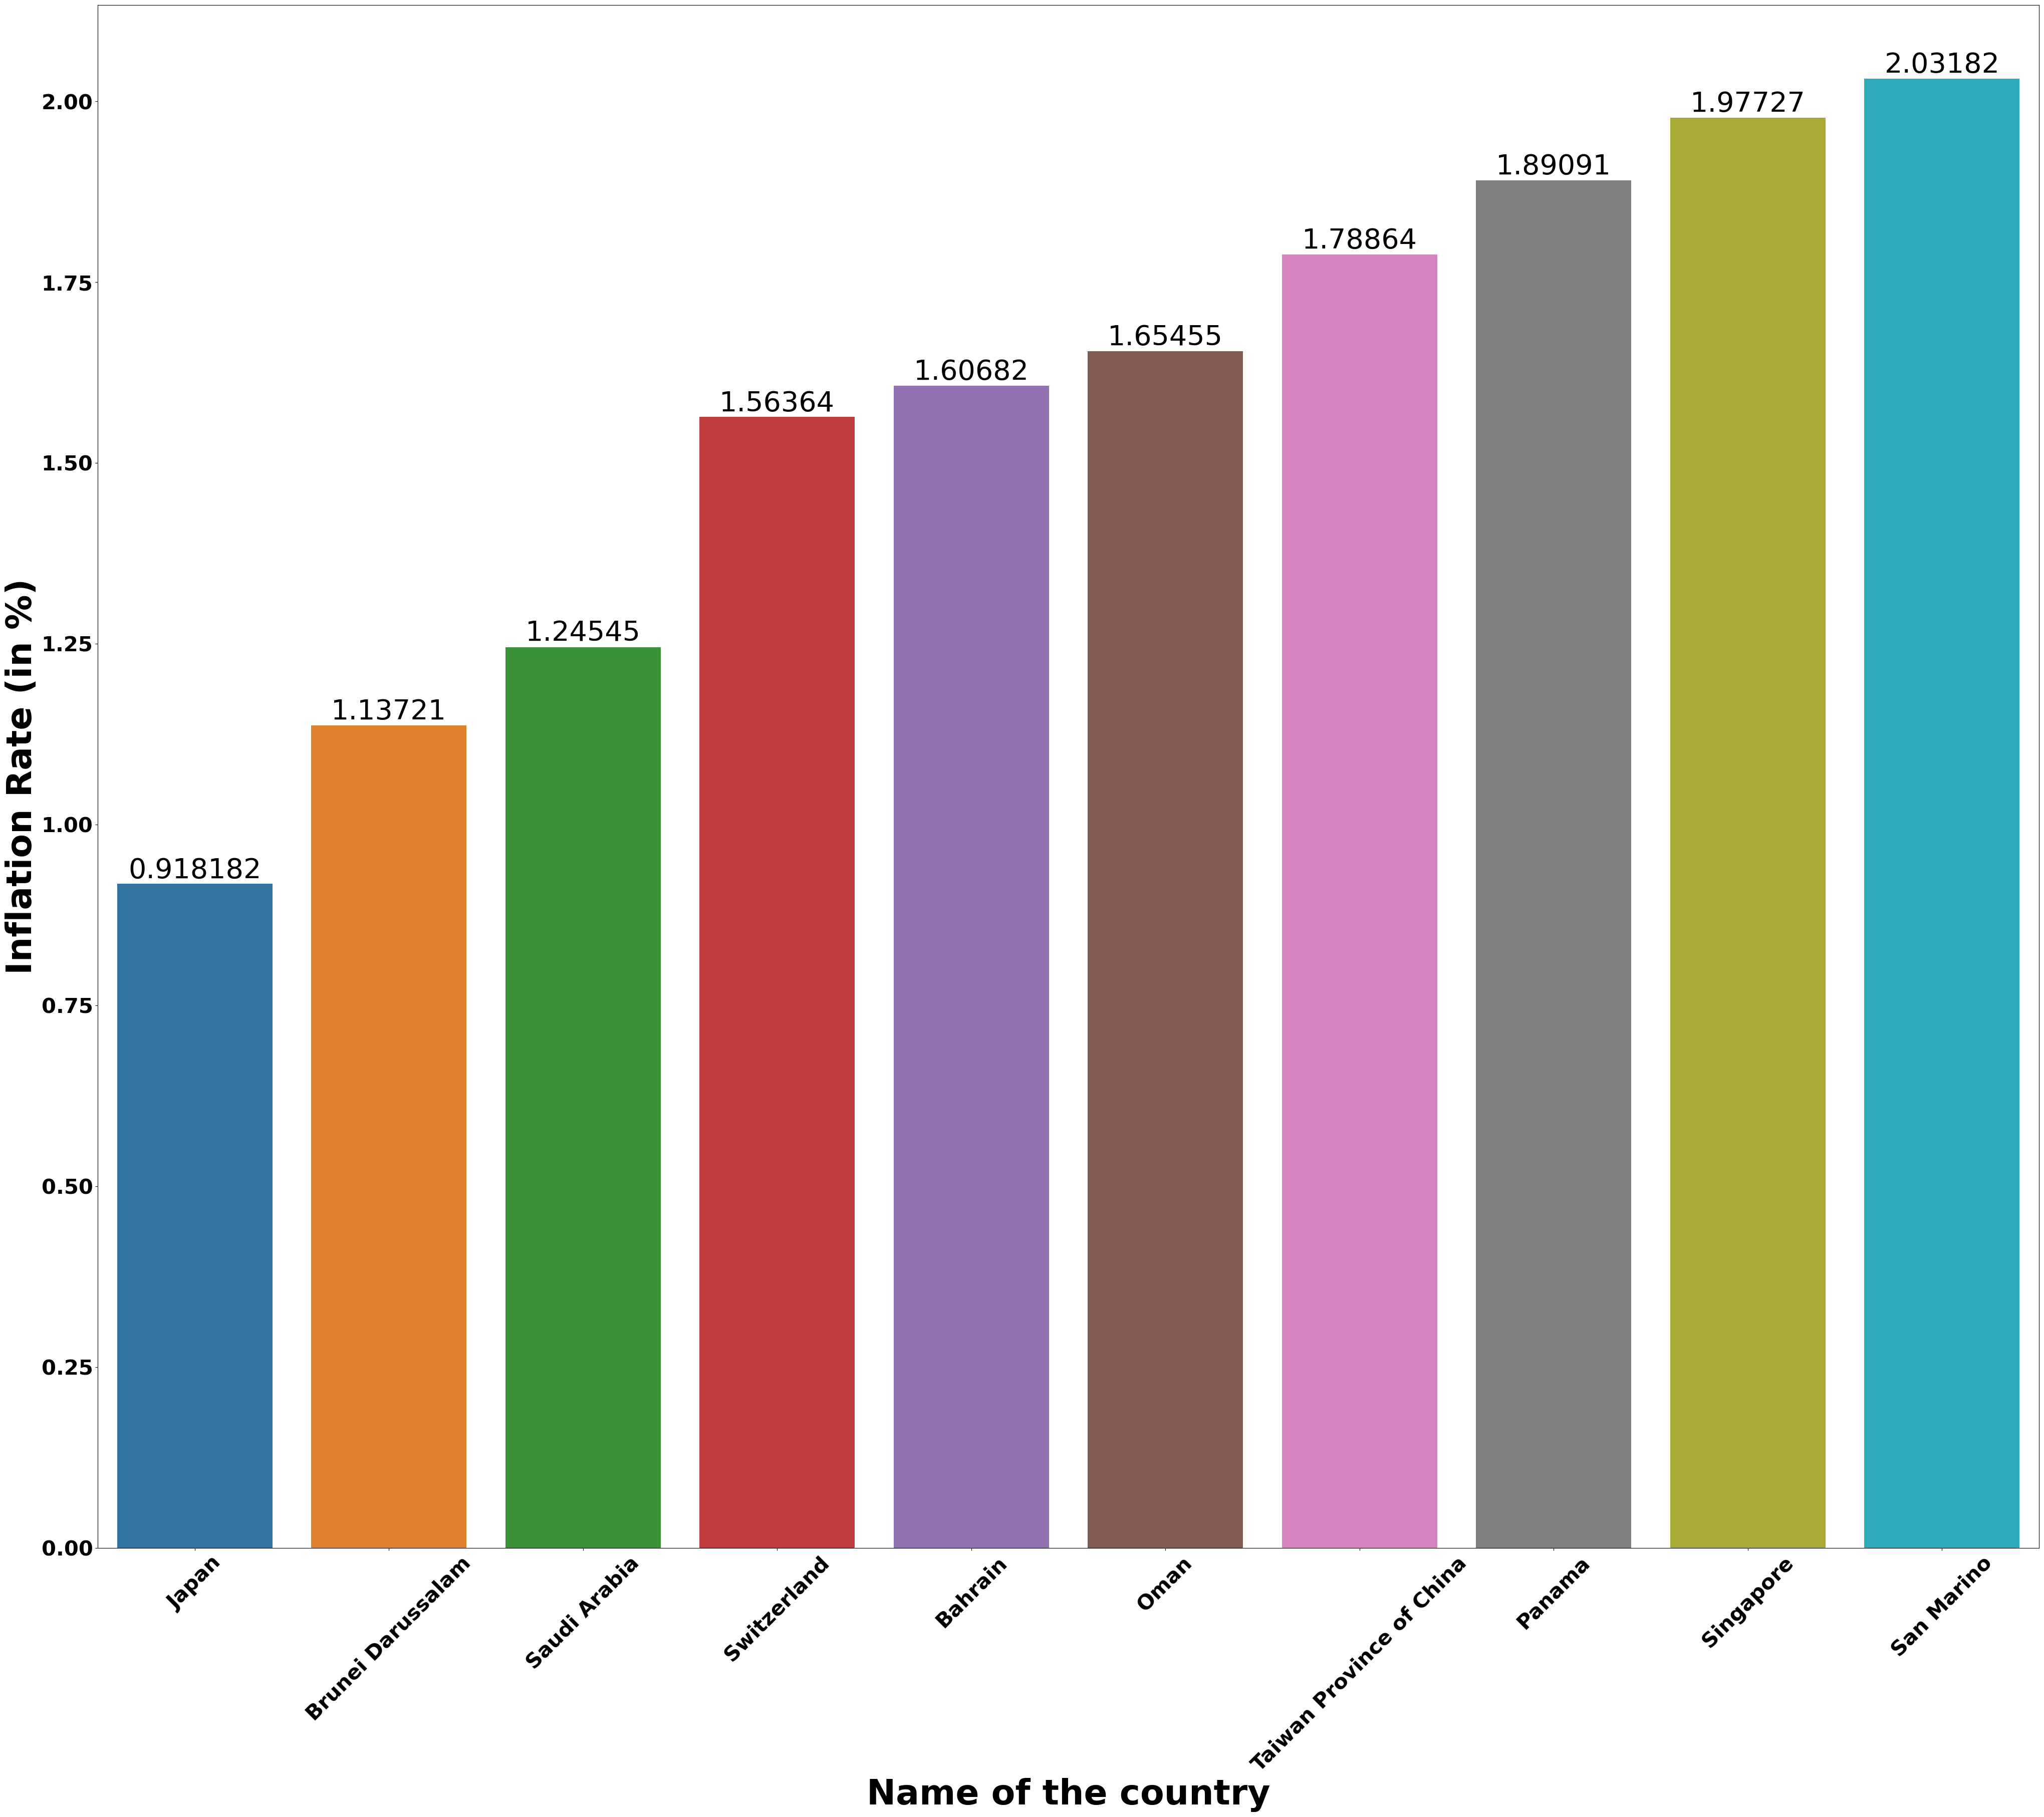

In [57]:
plt.figure(figsize=(50, 40))
ax=sns.barplot(data=lowest, x='country_name',y='Average Inflation by Country',errwidth=0)
ax.bar_label(ax.containers[0], fontsize=40)
plt.xticks(fontsize=30, fontweight='bold',rotation=45)
plt.xlabel('Name of the country', fontsize=50, fontweight='bold')
plt.ylabel('Inflation Rate (in %)', fontsize=50, fontweight='bold')
plt.yticks(fontsize=30, fontweight='bold')

__Bar plot indicating the average inflation levels of countries with the lowest average inflation level over the decades.__

In [58]:
#Choosing countries with the highest average inflation level over the decades
highest=average_inflation_by_country_with_names.sort_values('Average Inflation by Country',ascending=False).head(10)
highest

,country_name,Average Inflation by Country
190,Venezuela,2087.645455
39,"Congo, Dem. Rep. of the",808.734091
125,Nicaragua,690.722727
21,Bolivia,317.922727
136,Peru,293.400000
7,Armenia,291.196875
24,Brazil,267.725000
4,Angola,254.436364
183,Ukraine,232.196970
179,Turkmenistan,223.990625


/Users/sarthakyadav/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/sarthakyadav/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/sarthakyadav/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.,
        2250.]),
 [Text(0, 0.0, '0'),
  Text(0, 250.0, '250'),
  Text(0, 500.0, '500'),
  Text(0, 750.0, '750'),
  Text(0, 1000.0, '1000'),
  Text(0, 1250.0, '1250'),
  Text(0, 1500.0, '1500'),
  Text(0, 1750.0, '1750'),
  Text(0, 2000.0, '2000'),
  Text(0, 2250.0, '2250')])

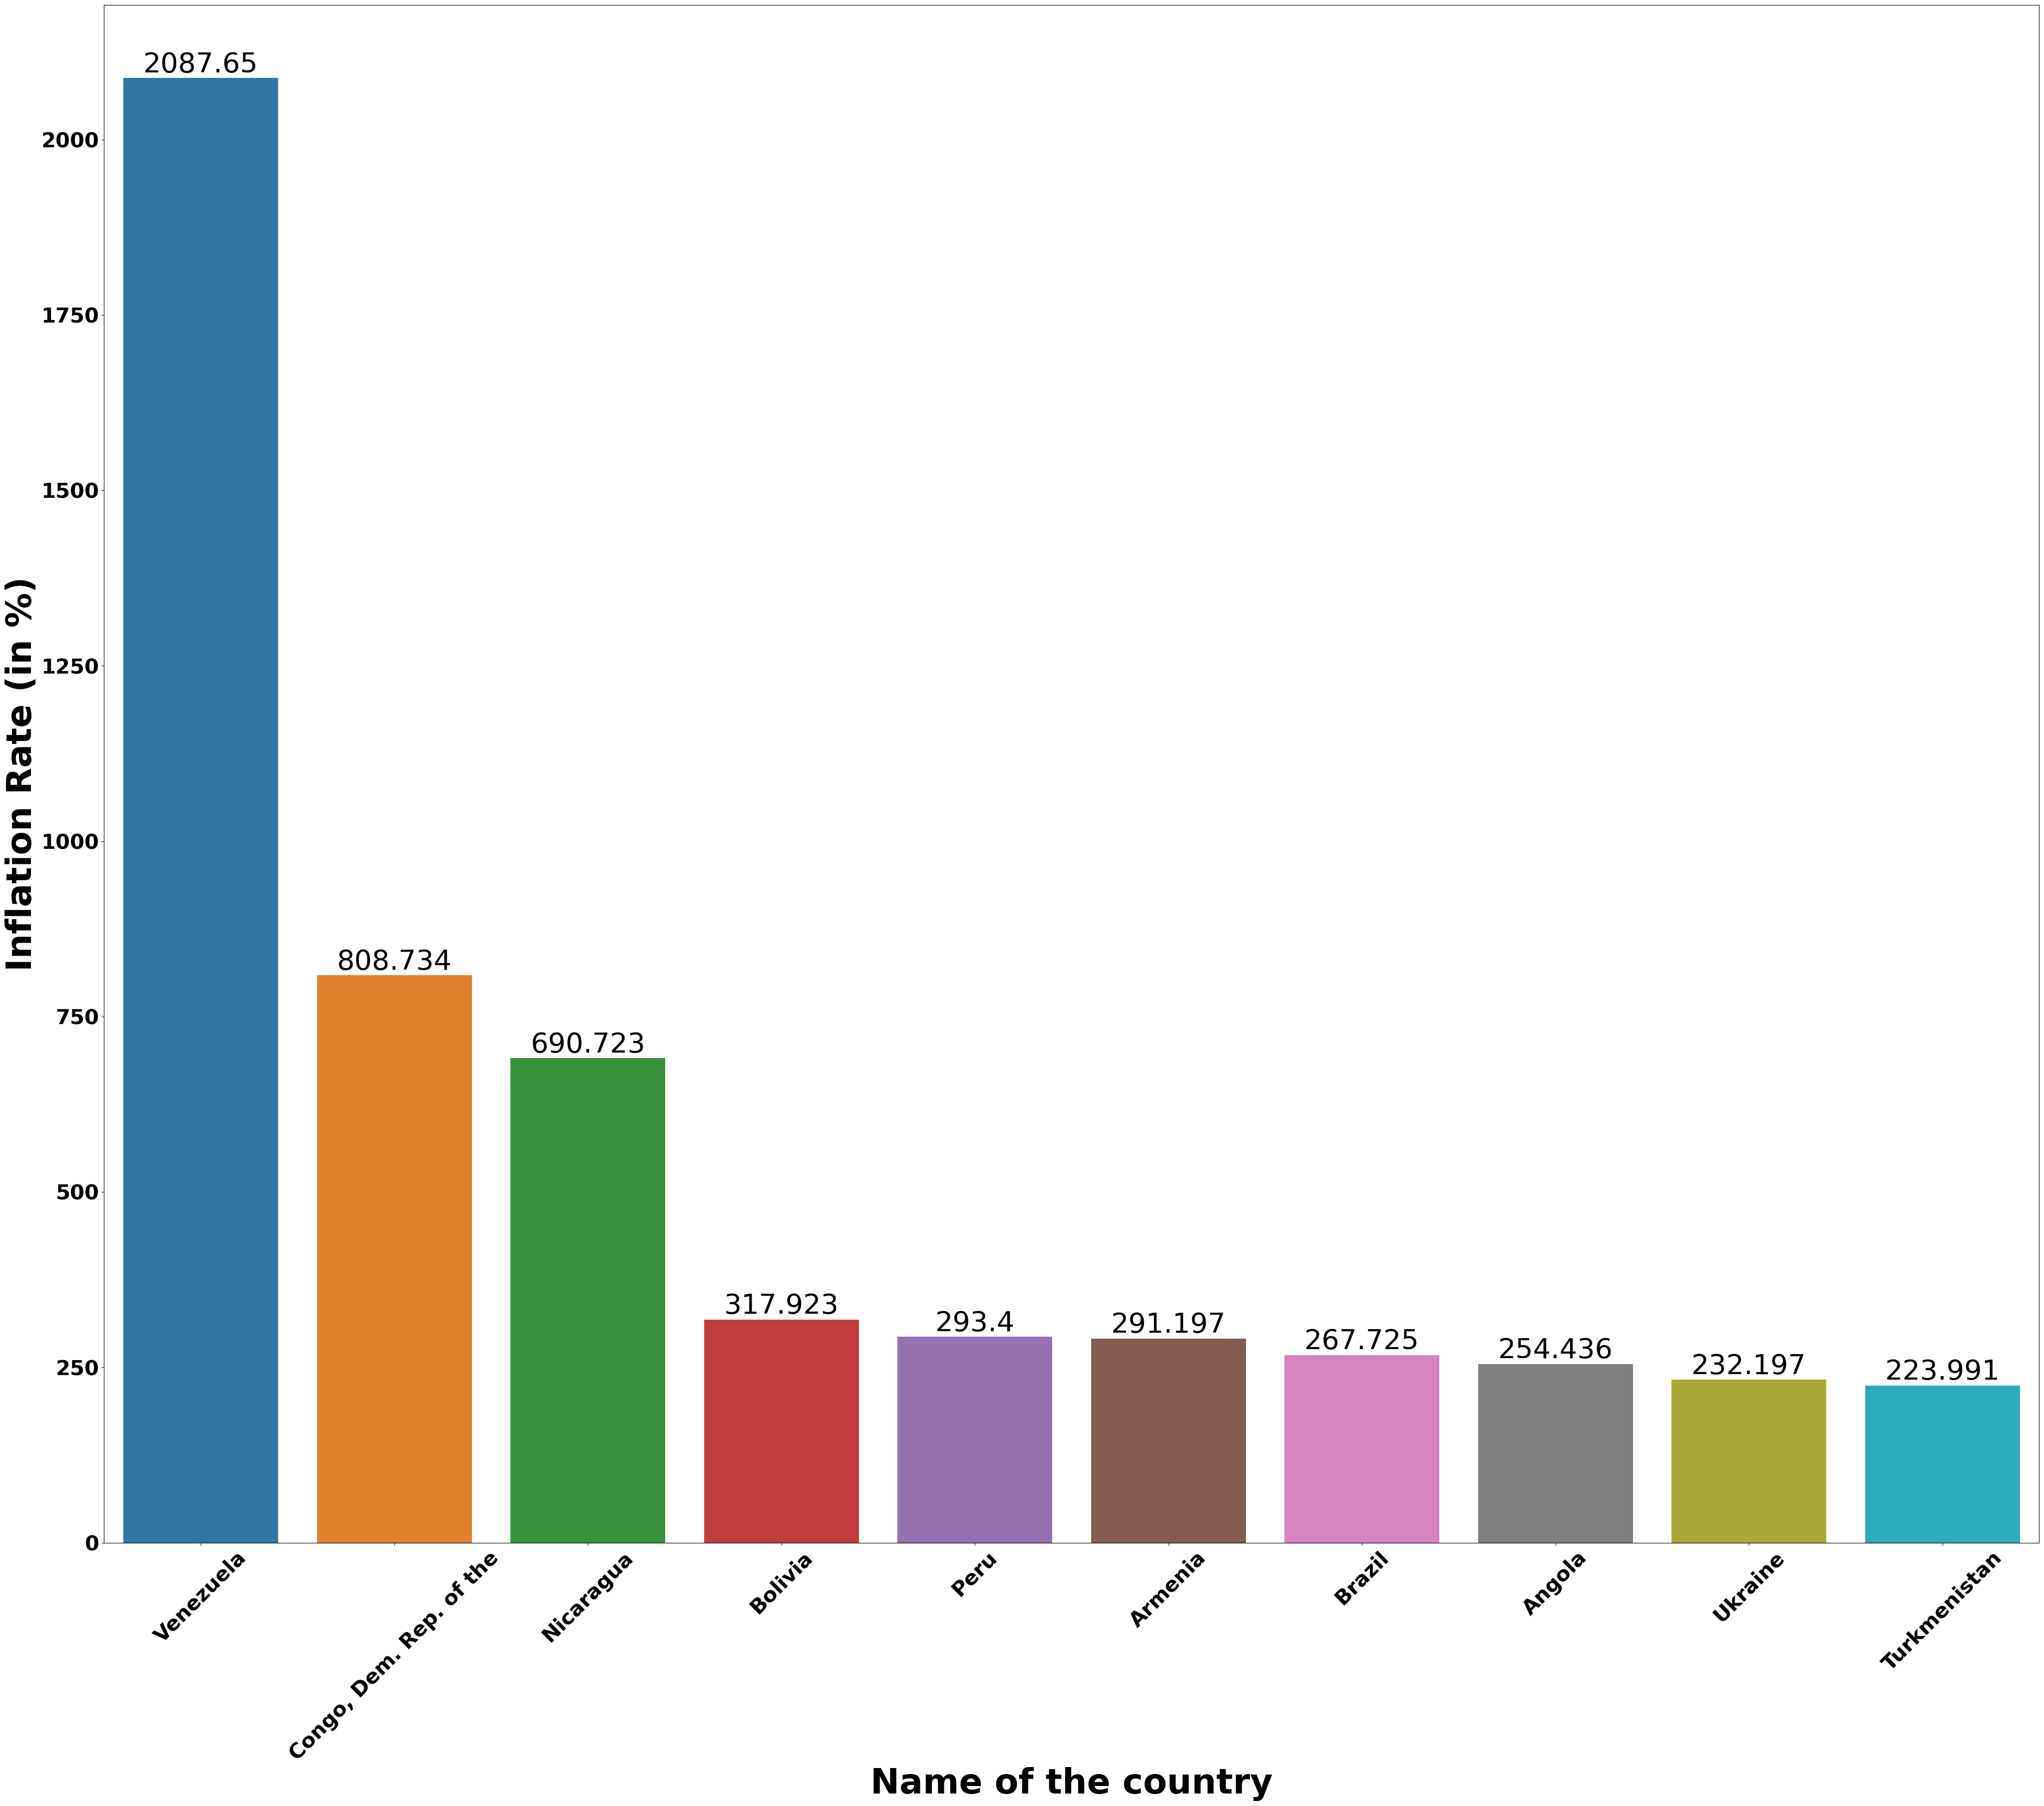

In [59]:
plt.figure(figsize=(50, 40))
ax=sns.barplot(data=highest, x='country_name',y='Average Inflation by Country',errwidth=0)
ax.bar_label(ax.containers[0], fontsize=40)
plt.xticks(fontsize=30, fontweight='bold',rotation=45)
plt.xlabel('Name of the country', fontsize=50, fontweight='bold')
plt.ylabel('Inflation Rate (in %)', fontsize=50, fontweight='bold')
plt.yticks(fontsize=30, fontweight='bold')

__Bar plot indicating the average inflation level of countries with the highest average inflation over the decades.__

In [61]:
!pip install pycountry

In [62]:
import pycountry
#Function to get iso code for country_name specified
def get_iso_alpha(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except:
        return None

In [63]:
#Applying the function to get iso codes for all the countries in the dataframe
df1['iso_alpha'] = df1['country_name'].apply(get_iso_alpha)
df1.head()

,country_name,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,iso_alpha
0,Afghanistan,13.4,22.2,18.2,15.9,20.4,8.7,-2.1,18.4,27.5,...,4.38,4.98,0.63,2.3,5.44,5.06,13.71,9.1,NaN,AFG
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.30,2.00,2.00,1.4,1.60,2.00,6.70,4.8,4.0,ALB
2,Algeria,9.7,14.6,6.6,7.8,6.3,10.4,14.0,5.9,5.9,...,6.40,5.60,4.30,2.0,2.40,7.20,9.30,9.0,6.8,DZA
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.40,2.60,1.00,0.5,0.10,1.70,6.20,5.2,3.5,AND
4,Angola,46.7,1.4,1.8,1.8,1.8,1.8,1.8,1.8,1.8,...,30.70,29.80,19.60,17.1,22.30,25.80,21.40,13.1,22.3,AGO


In [64]:
#Identifying the countries not having an iso code
missing_iso = df1[df1['iso_alpha'].isnull()]['country_name'].unique()
if len(missing_iso) > 0:
    print("Countries without ISO codes:", missing_iso)
else:
    print("All countries matched with an ISO code.")

Countries without ISO codes: ['Bahamas, The' "China, People's Republic of" 'Congo, Dem. Rep. of the'
 'Congo, Republic of ' 'Gambia, The' 'Hong Kong SAR' 'Kosovo' 'Lao P.D.R.'
 'Macao SAR' 'Micronesia, Fed. States of' 'North Macedonia '
 'South Sudan, Republic of' 'São Tomé and Príncipe'
 'Taiwan Province of China' 'Türkiye, Republic of' 'West Bank and Gaza']


In [65]:
#Transforming the DataFrame to a long format
df1 = pd.melt(df1, id_vars=['country_name', 'iso_alpha'], var_name='Year', value_name='Inflation Rate')
df1 = df1.dropna()  #Removing rows with NaN inflation rates
df1['Year'] = df1['Year'].astype(int)  #Ensuring the Year column is integer for sorting

#Creating the choropleth map
fig = px.choropleth(df1,
                    locations="iso_alpha",
                    color="Inflation Rate",
                    hover_name="country_name",
                    animation_frame="Year",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    range_color=[0, 2100],
                    projection="natural earth")

#Adding title and adjusting layout
fig.update_layout(title_text='Global Inflation Rate Over the Years',
                  geo=dict(showcoastlines=True, coastlinecolor="RebeccaPurple"),
                  coloraxis_colorbar=dict(title="Inflation Rate (%)"))
fig.show()

__The above visualization is an interactive plot of the world depicting the inflation levels across the countries each year from 1980 onwards. The color coding is such that countries with higher inflation in a particular year are closer to lighter colors, and those with lower inflation have darker colors.__

In [66]:
#Dropping indicator name for inflation indicator since all the data is for the same indicator
df2=df.drop(columns=['indicator_name'],axis=1)
df2

,country_name,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,13.4,22.2,18.2,15.9,20.4,8.7,-2.1,18.4,27.5,...,-0.66,4.38,4.98,0.63,2.3,5.44,5.06,13.71,9.1,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.90,1.30,2.00,2.00,1.4,1.60,2.00,6.70,4.8,4.0
2,Algeria,9.7,14.6,6.6,7.8,6.3,10.4,14.0,5.9,5.9,...,4.80,6.40,5.60,4.30,2.0,2.40,7.20,9.30,9.0,6.8
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.10,-0.40,2.60,1.00,0.5,0.10,1.70,6.20,5.2,3.5
4,Angola,46.7,1.4,1.8,1.8,1.8,1.8,1.8,1.8,1.8,...,9.20,30.70,29.80,19.60,17.1,22.30,25.80,21.40,13.1,22.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Vietnam,25.2,69.6,95.4,49.5,64.9,91.6,453.5,360.4,374.4,...,0.60,2.70,3.50,3.50,2.8,3.20,1.80,3.20,3.4,3.4
192,West Bank and Gaza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.40,-0.20,0.20,-0.20,1.6,-0.70,1.20,3.70,3.4,2.7
193,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22.00,21.30,30.40,33.60,15.7,21.70,31.50,29.50,14.9,17.3
194,Zambia,11.7,14.0,12.5,19.7,20.0,37.4,48.0,43.0,45.8,...,10.10,17.90,6.60,7.50,9.2,15.70,22.00,11.00,10.6,9.6


In [67]:
#Identifying all the countries with hyperinflation during the decades
high_inflation_countries=average_inflation_by_country_with_names[average_inflation_by_country_with_names['Average Inflation by Country']>100]['country_name'].unique()
#Converting those countries into a list
high_inf=list(high_inflation_countries)
high_inf

['Angola',
 'Armenia',
 'Azerbaijan',
 'Belarus',
 'Bolivia',
 'Brazil',
 'Congo, Dem. Rep. of the',
 'Kazakhstan',
 'Nicaragua',
 'Peru',
 'Russian Federation',
 'Tajikistan',
 'Turkmenistan',
 'Ukraine',
 'Uzbekistan',
 'Venezuela']

In [68]:
#Removing from the dataframe countries with hyperinflation during the decades
df2=df2[~df2['country_name'].isin(high_inf)]
df2

,country_name,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,13.4,22.2,18.2,15.9,20.4,8.7,-2.1,18.4,27.5,...,-0.66,4.38,4.98,0.63,2.3,5.44,5.06,13.71,9.1,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.90,1.30,2.00,2.00,1.4,1.60,2.00,6.70,4.8,4.0
2,Algeria,9.7,14.6,6.6,7.8,6.3,10.4,14.0,5.9,5.9,...,4.80,6.40,5.60,4.30,2.0,2.40,7.20,9.30,9.0,6.8
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.10,-0.40,2.60,1.00,0.5,0.10,1.70,6.20,5.2,3.5
5,Antigua and Barbuda,19.0,11.5,4.2,2.3,3.8,1.0,0.5,3.6,6.8,...,1.00,-0.50,2.40,1.20,1.4,1.10,1.60,7.50,5.0,2.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Vietnam,25.2,69.6,95.4,49.5,64.9,91.6,453.5,360.4,374.4,...,0.60,2.70,3.50,3.50,2.8,3.20,1.80,3.20,3.4,3.4
192,West Bank and Gaza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.40,-0.20,0.20,-0.20,1.6,-0.70,1.20,3.70,3.4,2.7
193,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22.00,21.30,30.40,33.60,15.7,21.70,31.50,29.50,14.9,17.3
194,Zambia,11.7,14.0,12.5,19.7,20.0,37.4,48.0,43.0,45.8,...,10.10,17.90,6.60,7.50,9.2,15.70,22.00,11.00,10.6,9.6


In [69]:
#Applying the function to get iso codes for countries in the filtered dataframe without countries with hyperinflation
df2['iso_alpha'] = df2['country_name'].apply(get_iso_alpha)
df2.head()

/var/folders/t8/lg4kw7yd6rq90rhc64r9hs980000gn/T/ipykernel_18418/242226716.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,country_name,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,iso_alpha
0,Afghanistan,13.4,22.2,18.2,15.9,20.4,8.7,-2.1,18.4,27.5,...,4.38,4.98,0.63,2.3,5.44,5.06,13.71,9.1,NaN,AFG
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.30,2.00,2.00,1.4,1.60,2.00,6.70,4.8,4.0,ALB
2,Algeria,9.7,14.6,6.6,7.8,6.3,10.4,14.0,5.9,5.9,...,6.40,5.60,4.30,2.0,2.40,7.20,9.30,9.0,6.8,DZA
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.40,2.60,1.00,0.5,0.10,1.70,6.20,5.2,3.5,AND
5,Antigua and Barbuda,19.0,11.5,4.2,2.3,3.8,1.0,0.5,3.6,6.8,...,-0.50,2.40,1.20,1.4,1.10,1.60,7.50,5.0,2.9,ATG


In [70]:
#Identifying the countries not having iso codes based on the function applied
missing_iso = df2[df2['iso_alpha'].isnull()]['country_name'].unique()
if len(missing_iso) > 0:
    print("Countries without ISO codes:", missing_iso)
else:
    print("All countries matched with an ISO code.")

Countries without ISO codes: ['Bahamas, The' "China, People's Republic of" 'Congo, Republic of '
 'Gambia, The' 'Hong Kong SAR' 'Kosovo' 'Lao P.D.R.' 'Macao SAR'
 'Micronesia, Fed. States of' 'North Macedonia '
 'South Sudan, Republic of' 'São Tomé and Príncipe'
 'Taiwan Province of China' 'Türkiye, Republic of' 'West Bank and Gaza']


In [71]:
#Transforming the DataFrame to a long format
df2 = pd.melt(df2, id_vars=['country_name', 'iso_alpha'], var_name='Year', value_name='Inflation Rate')
df2 = df2.dropna()  #Removing rows with NaN inflation rates
df2['Year'] = df2['Year'].astype(int)  #Ensuring the Year column is integer for sorting

#Creating the choropleth map
fig = px.choropleth(df2,
                    locations="iso_alpha",
                    color="Inflation Rate",
                    hover_name="country_name",
                    animation_frame="Year",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    range_color=[0, 100],
                    projection="natural earth")

#Adding title and adjusting layout
fig.update_layout(title_text='Global Inflation Rate Over the Years',
                  geo=dict(showcoastlines=True, coastlinecolor="RebeccaPurple"),
                  coloraxis_colorbar=dict(title="Inflation Rate (%)"))
fig.show()

__The above visualization is meant to be an interactive visualization depicting how inflation levels changed for the countries each year with countries having higher inflation being lighter colors, and those with lower inflation being darker colors. The purpose of this visualization is to better compare inflation levels across countries as countries with hyperinflation cannot skew the results.__

In [72]:
#Creating a subset of countries to perform extensive inflation analysis on
countries_considered=['United States', 'Canada', 'India', "China, People's Republic of", 'Switzerland', 'Germany', 'France','Japan','Korea, Republic of', 'Iceland', 'Finland']
countries_considered

['United States',
 'Canada',
 'India',
 "China, People's Republic of",
 'Switzerland',
 'Germany',
 'France',
 'Japan',
 'Korea, Republic of',
 'Iceland',
 'Finland']

In [73]:
#Filtering the dataframe to only have values for countries on which extensive inflation analysis will be performed
df_count_cons=df[df['country_name'].isin(countries_considered)]
df_count_cons

,country_name,indicator_name,1980,1981,1982,1983,1984,1985,1986,1987,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
32,Canada,Annual average inflation (consumer prices) rate,10.2,12.5,10.8,5.8,4.3,4.0,4.2,4.4,...,1.1,1.4,1.6,2.3,1.9,0.7,3.4,6.8,3.6,2.4
36,"China, People's Republic of",Annual average inflation (consumer prices) rate,NaN,2.5,2.0,2.0,2.7,9.3,6.5,7.3,...,1.5,2.1,1.5,1.9,2.9,2.5,0.9,1.9,0.7,1.7
59,Finland,Annual average inflation (consumer prices) rate,11.6,12.0,9.3,8.4,7.0,5.8,2.9,4.1,...,-0.2,0.4,0.8,1.2,1.1,0.4,2.1,7.2,4.5,1.9
60,France,Annual average inflation (consumer prices) rate,13.1,13.3,12.0,9.5,7.7,5.8,2.5,3.3,...,0.1,0.3,1.2,2.1,1.3,0.5,2.1,5.9,5.6,2.5
64,Germany,Annual average inflation (consumer prices) rate,5.4,6.3,5.3,3.3,2.4,2.1,-0.1,0.2,...,0.7,0.4,1.7,1.9,1.4,0.4,3.2,8.7,6.3,3.5
76,Iceland,Annual average inflation (consumer prices) rate,58.5,50.9,51.0,84.3,29.2,32.4,21.3,18.8,...,1.6,1.7,1.8,2.7,3.0,2.8,4.5,8.3,8.6,4.5
77,India,Annual average inflation (consumer prices) rate,11.3,12.7,7.7,12.6,6.5,6.3,8.9,9.1,...,4.9,4.5,3.6,3.4,4.8,6.2,5.5,6.7,5.5,4.6
85,Japan,Annual average inflation (consumer prices) rate,7.8,4.9,2.7,1.9,2.3,2.0,0.6,0.1,...,0.8,-0.1,0.5,1.0,0.5,0.0,-0.2,2.5,3.2,2.9
90,"Korea, Republic of",Annual average inflation (consumer prices) rate,28.7,21.4,7.2,3.4,2.3,2.5,2.8,3.0,...,0.7,1.0,1.9,1.5,0.4,0.5,2.5,5.1,3.4,2.3
167,Switzerland,Annual average inflation (consumer prices) rate,4.0,6.5,5.7,3.0,2.9,3.4,0.7,1.4,...,-1.1,-0.4,0.5,0.9,0.4,-0.7,0.6,2.8,2.2,2.0


In [74]:
#Dropping the inflation indicator as it has only one value for all the countries
df_count_cons=df_count_cons.drop(columns=['indicator_name'],axis=1)
df_count_cons

,country_name,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
32,Canada,10.2,12.5,10.8,5.8,4.3,4.0,4.2,4.4,4.0,...,1.1,1.4,1.6,2.3,1.9,0.7,3.4,6.8,3.6,2.4
36,"China, People's Republic of",NaN,2.5,2.0,2.0,2.7,9.3,6.5,7.3,18.8,...,1.5,2.1,1.5,1.9,2.9,2.5,0.9,1.9,0.7,1.7
59,Finland,11.6,12.0,9.3,8.4,7.0,5.8,2.9,4.1,5.1,...,-0.2,0.4,0.8,1.2,1.1,0.4,2.1,7.2,4.5,1.9
60,France,13.1,13.3,12.0,9.5,7.7,5.8,2.5,3.3,2.7,...,0.1,0.3,1.2,2.1,1.3,0.5,2.1,5.9,5.6,2.5
64,Germany,5.4,6.3,5.3,3.3,2.4,2.1,-0.1,0.2,1.3,...,0.7,0.4,1.7,1.9,1.4,0.4,3.2,8.7,6.3,3.5
76,Iceland,58.5,50.9,51.0,84.3,29.2,32.4,21.3,18.8,25.5,...,1.6,1.7,1.8,2.7,3.0,2.8,4.5,8.3,8.6,4.5
77,India,11.3,12.7,7.7,12.6,6.5,6.3,8.9,9.1,7.2,...,4.9,4.5,3.6,3.4,4.8,6.2,5.5,6.7,5.5,4.6
85,Japan,7.8,4.9,2.7,1.9,2.3,2.0,0.6,0.1,0.7,...,0.8,-0.1,0.5,1.0,0.5,0.0,-0.2,2.5,3.2,2.9
90,"Korea, Republic of",28.7,21.4,7.2,3.4,2.3,2.5,2.8,3.0,7.1,...,0.7,1.0,1.9,1.5,0.4,0.5,2.5,5.1,3.4,2.3
167,Switzerland,4.0,6.5,5.7,3.0,2.9,3.4,0.7,1.4,1.9,...,-1.1,-0.4,0.5,0.9,0.4,-0.7,0.6,2.8,2.2,2.0


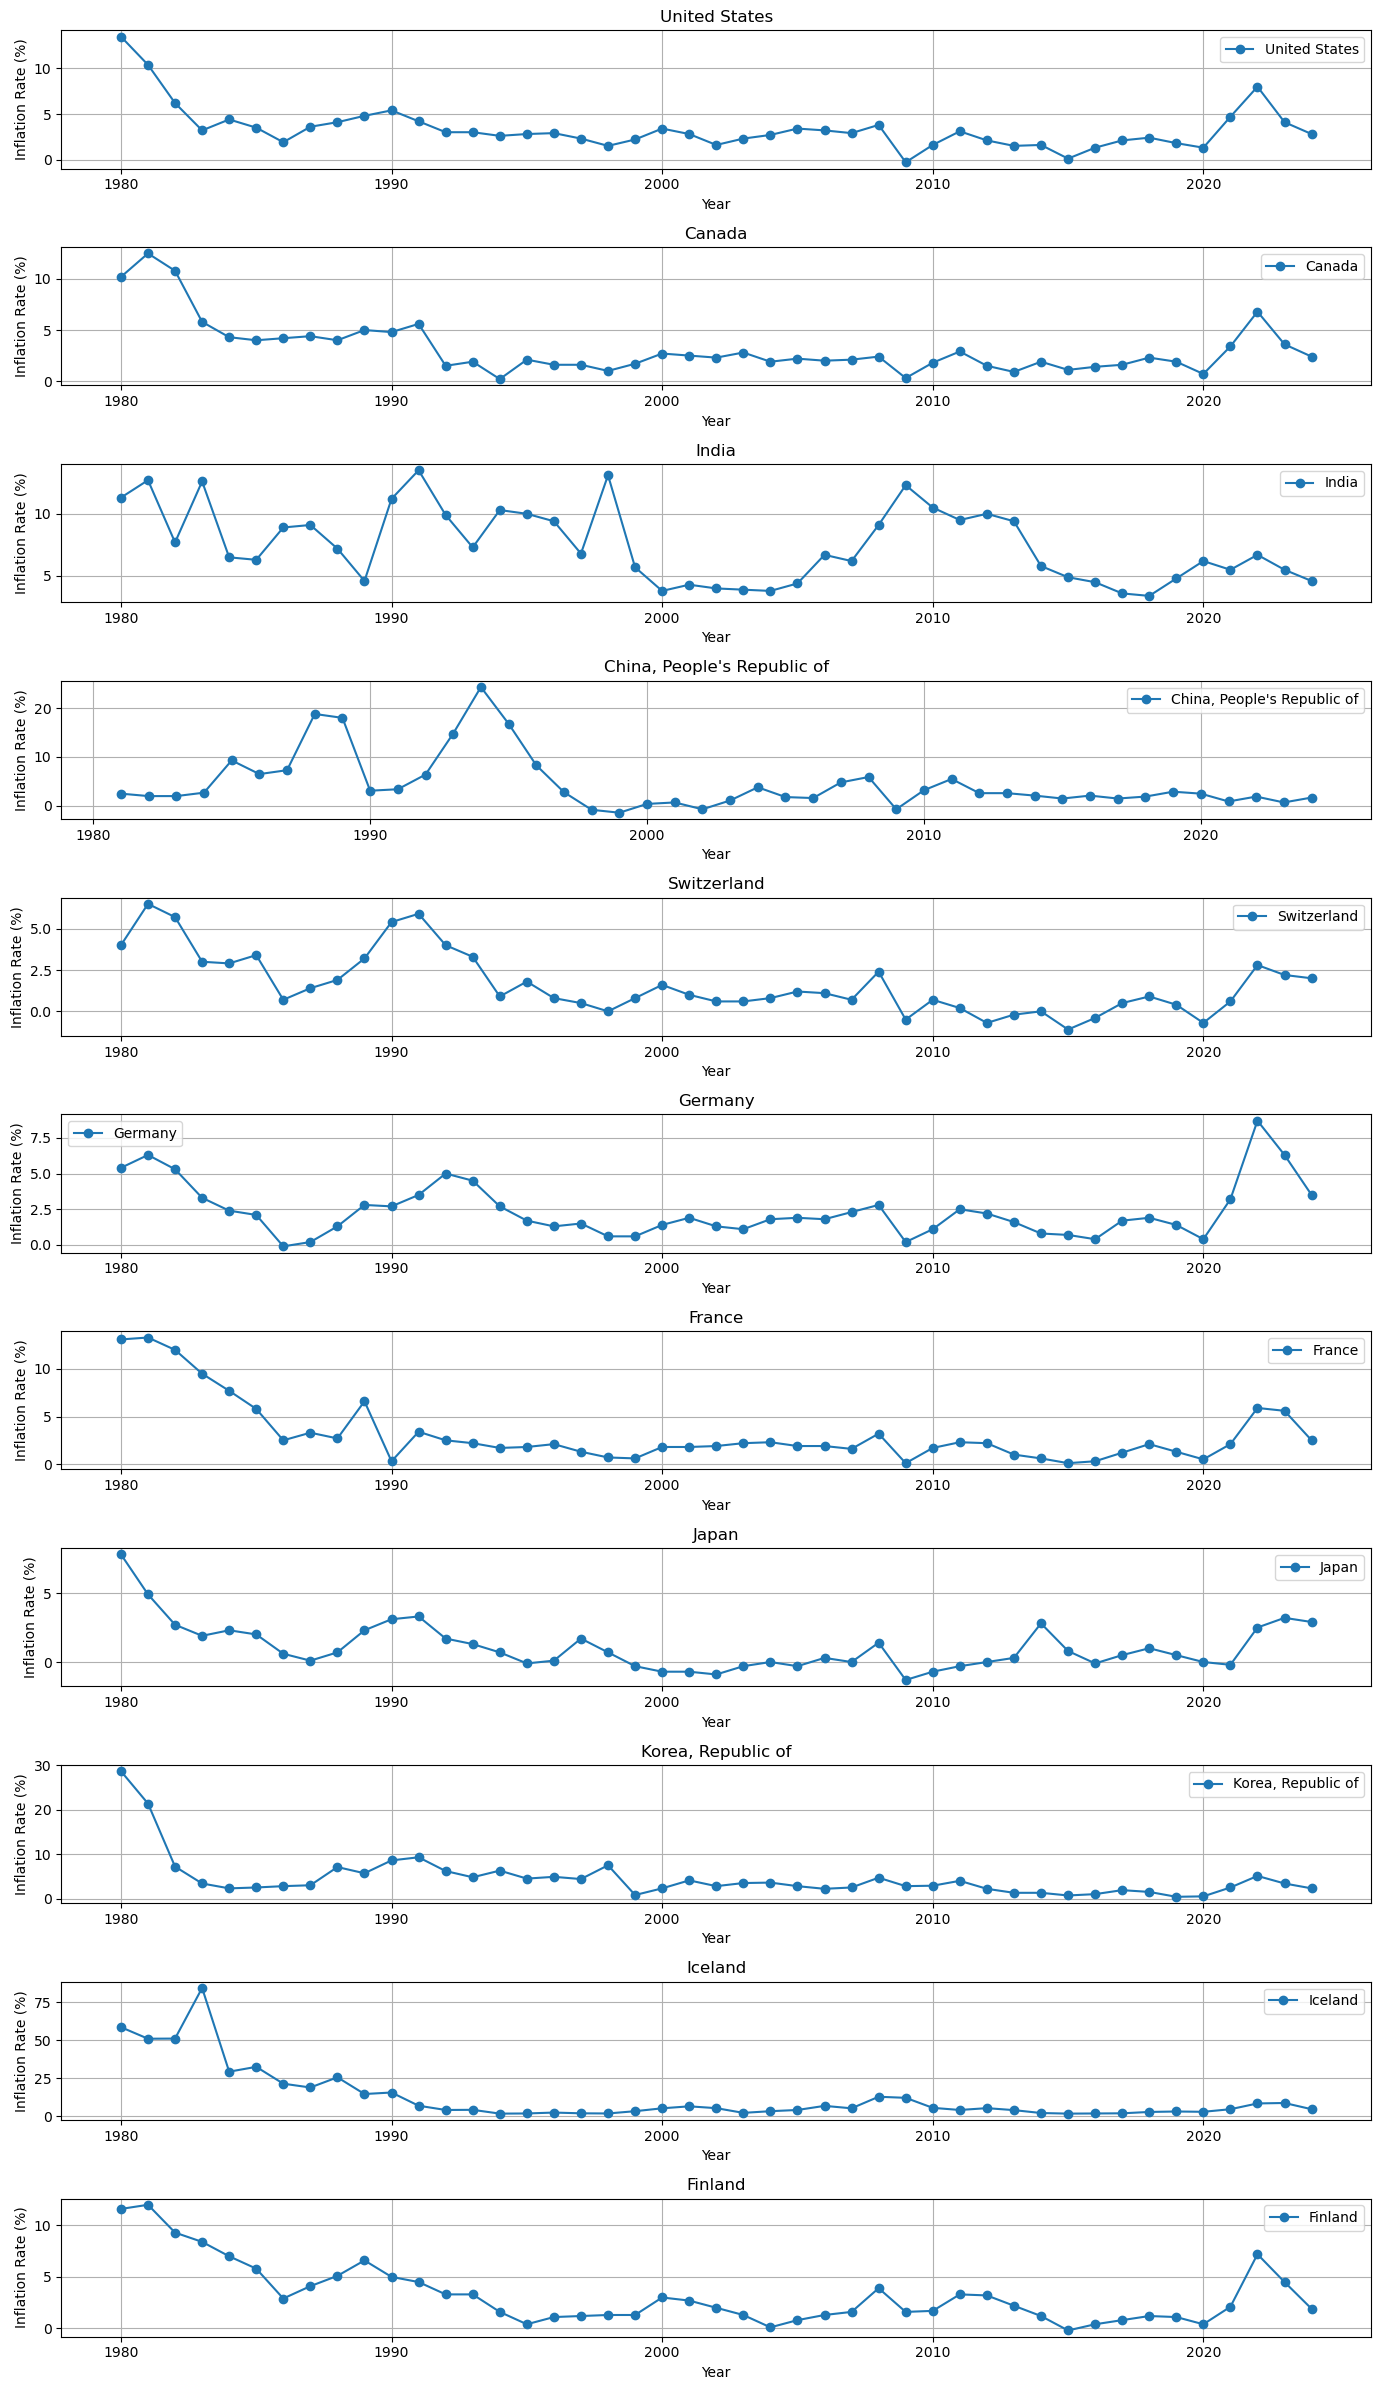

In [75]:
#Creating time series plots for each of the countries to evaluate the periods of high and low inflation based
#on which it can be identified when these countries were in economic recession and expansion
plt.figure(figsize=(14, 24))
#Loop through each country in the list and create a time series plot for each
for i, country in enumerate(countries_considered, start=1):
    plt.subplot(len(countries_considered), 1, i)
    country_data = df[df['country_name'] == country].iloc[:, 2:].T
    country_data.index = country_data.index.map(int) 
    plt.plot(country_data, label=country, marker='o', linestyle='-')
    plt.title(country)
    plt.xlabel('Year')
    plt.ylabel('Inflation Rate (%)')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

__The above time series plots are meant to indicate how inflation levels for each of the countries being considered was changing and what value it had for each of the years which can in turn be useful to identify periods of economic growth or economic recession in the countries.__

In [76]:
#Further creating a subset of countries to do comparative inflation analysis on
countries=['United States','Canada',"China, People's Republic of", 'India']
#Filtering the dataframe to only include data for this subset of countries
df_filter1=df_count_cons[df_count_cons['country_name'].isin(countries)]
df_filter1

,country_name,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
32,Canada,10.2,12.5,10.8,5.8,4.3,4.0,4.2,4.4,4.0,...,1.1,1.4,1.6,2.3,1.9,0.7,3.4,6.8,3.6,2.4
36,"China, People's Republic of",NaN,2.5,2.0,2.0,2.7,9.3,6.5,7.3,18.8,...,1.5,2.1,1.5,1.9,2.9,2.5,0.9,1.9,0.7,1.7
77,India,11.3,12.7,7.7,12.6,6.5,6.3,8.9,9.1,7.2,...,4.9,4.5,3.6,3.4,4.8,6.2,5.5,6.7,5.5,4.6
186,United States,13.5,10.4,6.2,3.2,4.4,3.5,1.9,3.6,4.1,...,0.1,1.3,2.1,2.4,1.8,1.3,4.7,8.0,4.1,2.8


In [77]:
#Calculate the level of change in inflation (standard deviation) for the subset of countries
volatility=df_filter1.iloc[:,2:].std(axis=1)
volatility

32     2.428878
36     5.680735
77     2.958755
186    1.874243
dtype: float64

In [78]:
#Identify the country corresponding to the level of fluctuation they have in inflation
volatility.index=df_filter1['country_name']
volatility

country_name
Canada                         2.428878
China, People's Republic of    5.680735
India                          2.958755
United States                  1.874243
dtype: float64

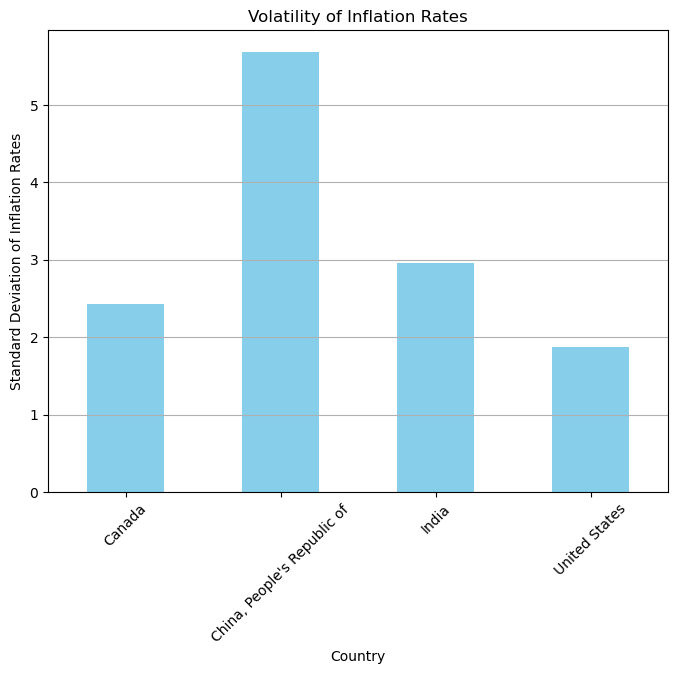

In [79]:
plt.figure(figsize=(8, 6))
volatility.plot(kind='bar', color='skyblue')
plt.title('Volatility of Inflation Rates')
plt.xlabel('Country')
plt.ylabel('Standard Deviation of Inflation Rates')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

__The above bar plot is meant to indicate the level of change in inflation over the decades each of the countries considered underwent, i.e., the level of fluctuation in their inflation levels over the decades. China's inflation fluctuated the most, while the United States maintained fairly consistent inflation over the decades.__

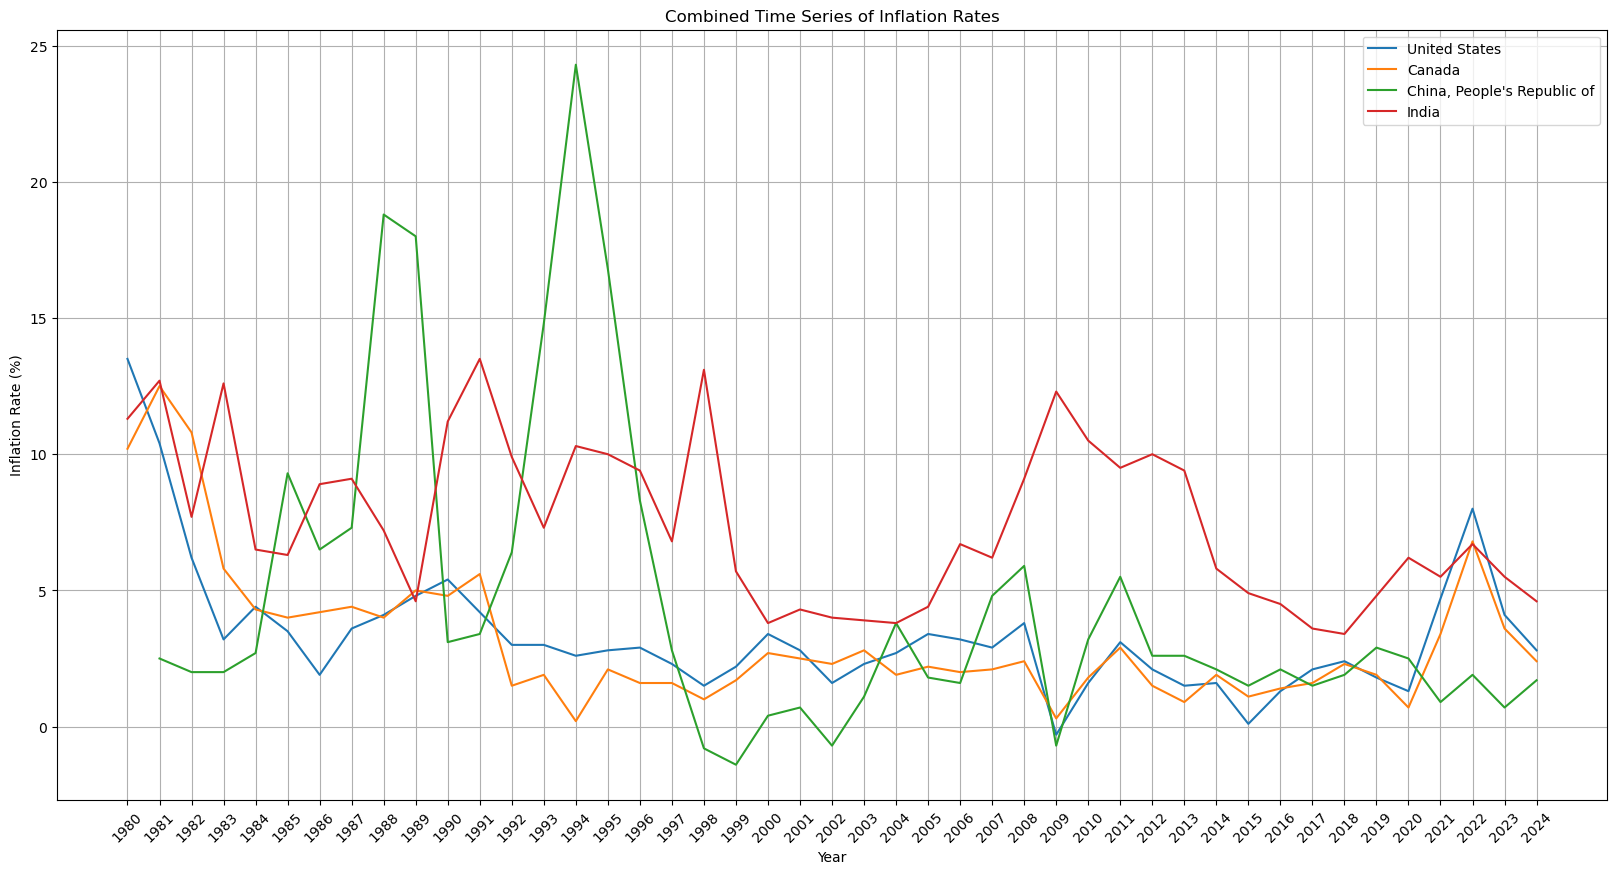

In [80]:
plt.figure(figsize=(20, 10))

for country in countries:
    country_data = df[df['country_name'] == country].iloc[:, 2:].T
    plt.plot(country_data.index, country_data.values, marker='', linestyle='-', label=country)

plt.title('Combined Time Series of Inflation Rates')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

__The above time series visualization is used to provide a more comparative analysis for inflation levels in China, United States, Canada, and India. From this visualization it is observed that India typically maintained a higher level of inflation as compared to the other countries. The United States, and Canada were observed to have inflation following similar trends. China's inflation levels fluctuated considerably especially in the 1990s, and in recent years have remained lower than those of other countries.__